In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

import difflib

In [2]:
data=pd.read_csv("data/census_cities.csv")
feature=pd.read_csv("data/aspect_cities.csv")

In [3]:
seg_score = data.iloc[:,19:22]
race_ratio = data.iloc[:,16:19]

np_seg = np.array(seg_score)
np_rac = np.array(race_ratio)

dep_var = np.sum(np_seg*np_rac, axis = 1)

In [4]:
new_city = data['Metro'].str.split("-" or ",", n=1, expand =True)[0]

In [5]:
new_city = pd.DataFrame(new_city)
new_city['Seg_level'] = dep_var
new_city = new_city.rename(columns={0:"city_list"})

In [6]:
new_city['city_list'] = new_city['city_list'].map(lambda x: difflib.get_close_matches(x, feature['city']))

In [7]:
new_city = new_city[new_city.astype(str)['city_list'] != '[]']
new_city['city'] = new_city['city_list'].map(lambda x:x[0])

In [8]:
new_city = new_city.drop(columns = ['city_list'])
feature_seg = pd.merge(feature, new_city, on="city")

In [9]:
dep_var = feature_seg.iloc[:,-1:]
mul_var = feature_seg.iloc[:,2:-1]

In [10]:
mul_var

,public transportation,driving and traffic,job opportunites and economy,education,culture and art,recreations,climates,crime,government,neighbors,opportunities
0,0.197668,-0.440146,0.340474,0.459704,0.578283,0.846061,0.536585,-0.757582,-0.214248,0.237775,0.306568
1,0.030941,-0.207608,0.160064,0.290912,0.643196,0.768950,-0.174179,-0.942235,-0.282609,-0.128773,0.281596
2,-0.030139,-0.271145,0.391489,0.633116,0.864085,0.827097,-0.153520,-1.106667,-0.306991,0.212181,0.700000
3,-0.167150,-0.291404,0.398338,0.607485,0.818705,0.823924,-0.035719,-1.118670,-0.269115,0.202753,0.365293
4,0.292977,-0.216283,0.285840,0.764006,0.472653,0.823509,-0.142296,-0.738390,-0.479198,0.615385,0.416667
5,0.817857,-0.265260,-0.039361,0.496577,0.551306,0.781489,0.190476,-1.033462,-0.415007,-0.101763,0.113333
6,0.068289,-0.479057,0.253366,0.673447,0.820513,0.833557,-0.053982,-0.967327,-0.156006,0.363468,0.553072
7,0.464632,-0.279104,0.658878,0.658875,0.803873,0.918010,-0.184254,-0.541667,-0.399681,0.535958,0.857143
8,0.099637,-0.349501,0.270260,0.697868,0.785689,0.731133,0.065789,-0.769605,-0.186947,0.348615,0.474169
9,0.395328,-0.552414,0.120409,0.263692,0.292972,0.518070,0.560000,-0.824652,-0.183432,-0.012359,0.517143


In [11]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = mul_var.columns
vif["vif_Factor"] = [variance_inflation_factor(mul_var.values, i) for i in range(mul_var.shape[1])]
vif

,features,vif_Factor
0,public transportation,3.257338
1,driving and traffic,3.186888
2,job opportunites and economy,13.821775
3,education,65.465744
4,culture and art,43.525626
5,recreations,61.954552
6,climates,2.093840
7,crime,32.944651
8,government,5.541769
9,neighbors,14.001559


In [12]:
#Run OLS regression with Constant term
mul_var_con = sm.add_constant(mul_var)
ols_reg = sm.OLS(dep_var, mul_var_con).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Seg_level   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.401
Date:                Sun, 25 Apr 2021   Prob (F-statistic):              0.244
Time:                        10:20:21   Log-Likelihood:                -106.45
No. Observations:                  33   AIC:                             236.9
Df Residuals:                      21   BIC:                             254.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [13]:
#Run Regression (sklearn - for Crosscheck): this is same with the above OLS result
regression = LinearRegression()
regression.fit(mul_var, dep_var)
coefficient = regression.coef_

<BarContainer object of 11 artists>

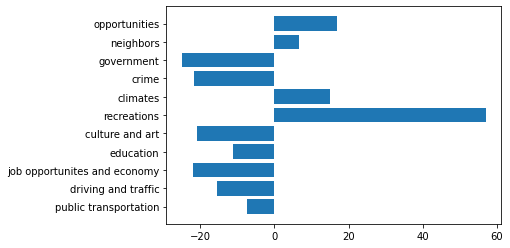

In [14]:
plt.barh(mul_var.columns, np.squeeze(coefficient))

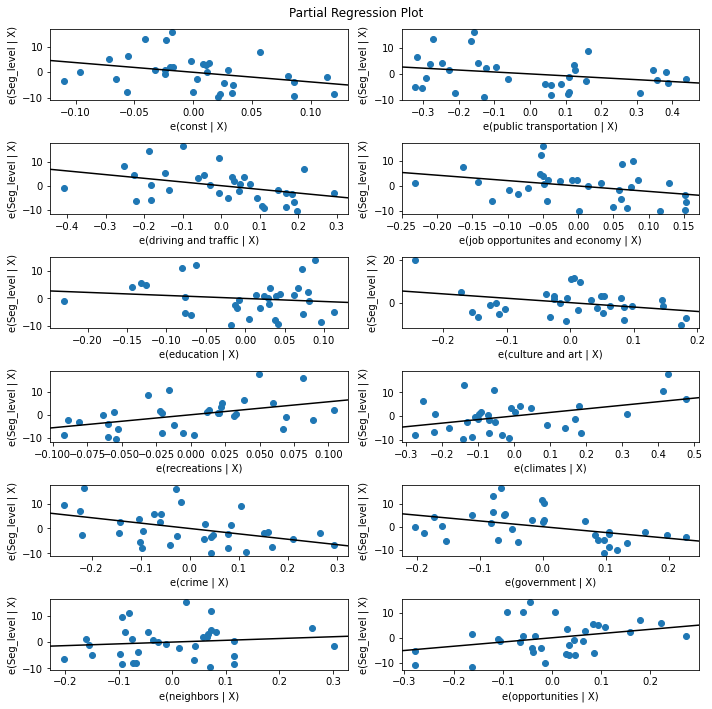

In [15]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(10,10), dpi = 500)
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

fig = plt.figure(figsize=(10, 10))
plot_partregress_grid(ols_reg, fig=fig)
plt.show()
#figure = sm.graphics.plot_partregress_grid(ols_reg)
#figure.tight_layout(pad=1.0)